In [ ]:
#importing libraries
import pandas as pd

In [ ]:
#importing sqlite3
import sqlite3

In [ ]:
#installing ipython-sql
!pip install ipython-sql

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Load the SQL extension and connect to SQLite
%load_ext sql
%sql sqlite:///sales_data.db

In [ ]:
#connecting to the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS sales (
    date TEXT NOT NULL,
    name TEXT NOT NULL,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
);

In [ ]:
cursor.execute("DELETE FROM sales")
conn.commit()

In [ ]:
%%sql
INSERT INTO sales (date, name, product, quantity, price) VALUES
('2025-04-01', 'Alice Smith', 'Laptop', 1, 1200.00),
('2025-04-02', 'Bob Johnson', 'Smartphone', 2, 800.00),
('2025-04-03','Carol White','Headphones',3,150),
('2025-04-04', 'David Brown', 'Monitor', 1, 300.00),
('2025-04-05', 'Eva Green', 'Keyboard', 2, 75.00),
('2025-04-06','Frank Black','Mouse',2,40.00),
('2025-04-07', 'Grace Blue', 'Webcam', 1, 90.00),
('2025-04-08', 'Hank Silver', 'Printer', 1, 250.00),
('2025-04-09','Ivy Gold','Tablet',1,450.00),
('2025-04-10', 'Jack Orange', 'Desk Lamp', 2, 60.00);

In [ ]:
sales_data = pd.read_sql_query("SELECT * FROM sales", conn)

In [ ]:
print(sales_data)

In [ ]:
sales_data = pd.read_sql_query("SELECT count(*) FROM sales", conn)

In [18]:
print(sales_data)


SELECT
    SUM(quantity) AS total_quantity_sold,
    SUM(quantity * price) AS total_revenue
FROM sales



In [19]:
sales_data = pd.read_sql_query("SELECT sum(price) as total_revenue FROM sales", conn)
print(sales_data)

   total_revenue
0         3415.0


In [20]:
#getting Total Quantity and Revenue
sales_data = """
SELECT
    SUM(quantity) AS total_quantity_sold,
    SUM(quantity * price) AS total_revenue
FROM sales
"""

summary_sales_data = pd.read_sql_query(sales_data, conn)
summary_sales_data

,total_quantity_sold,total_revenue
0,16,4690.0


In [21]:
#Grouped Sales Summary 
product_summary = pd.read_sql_query("""
SELECT
    product,
    price,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
ORDER BY total_revenue DESC
""", conn)

product_summary

,product,price,total_quantity,total_revenue
0,Smartphone,800.0,2,1600.0
1,Laptop,1200.0,1,1200.0
2,Tablet,450.0,1,450.0
3,Headphones,150.0,3,450.0
4,Monitor,300.0,1,300.0
5,Printer,250.0,1,250.0
6,Keyboard,75.0,2,150.0
7,Desk Lamp,60.0,2,120.0
8,Webcam,90.0,1,90.0
9,Mouse,40.0,2,80.0


Total Quantity Sold: 16
Total Revenue: $ 4690.0


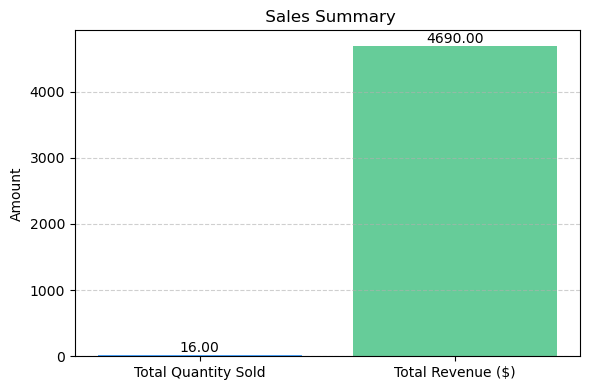

In [37]:

result = cursor.execute(query).fetchone()
total_quantity, total_revenue = result

# Print summary
print("Total Quantity Sold:", total_quantity)
print("Total Revenue: $", round(total_revenue, 2))

# Create bar chart
labels = ['Total Quantity Sold', 'Total Revenue ($)']
values = [total_quantity, total_revenue]

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=['#4da6ff', '#66cc99'])

# Add data labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom')

plt.title(' Sales Summary')
plt.ylabel('Amount')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [38]:
plt.savefig("sales_chart.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

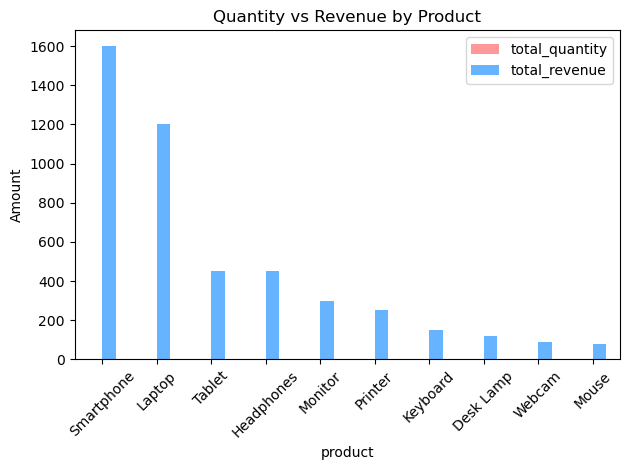

In [30]:
# Query to get total quantity and revenue by product
query_stacked_bar = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
ORDER BY total_revenue DESC
"""

# Get data
data_stacked = pd.read_sql_query(query_stacked_bar, conn)

# Plot Stacked Bar Chart
data_stacked.plot(
    x='product',
    kind='bar',
    stacked=False,
    y=['total_quantity', 'total_revenue'],
    color=['#ff9999', '#66b3ff']
)
plt.title('Quantity vs Revenue by Product')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()

# Save chart
plt.savefig("stacked_sales_bar.png", dpi=300)
plt.show()


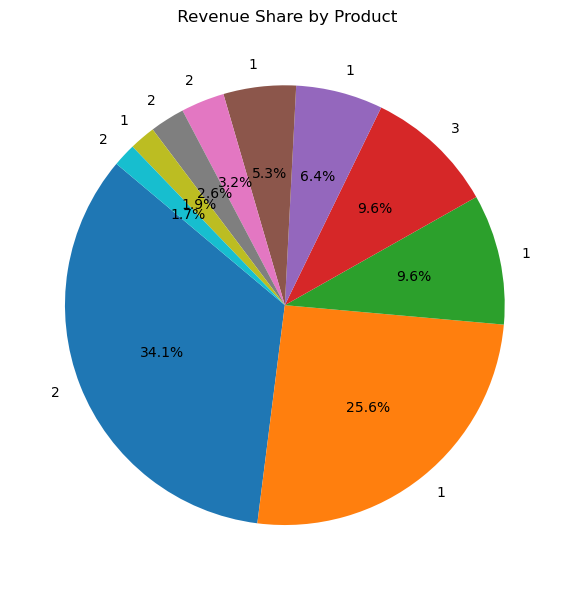

In [31]:
#get data from query_stacked_bar
product_revenue = pd.read_sql_query(query_stacked_bar, conn)

# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(product_revenue['total_revenue'], labels=product_revenue['total_quantity'], autopct='%1.1f%%', startangle=140)
plt.title(' Revenue Share by Product')
plt.tight_layout()

# Save chart
plt.savefig("product_revenue_pie.png", dpi=300)
plt.show()